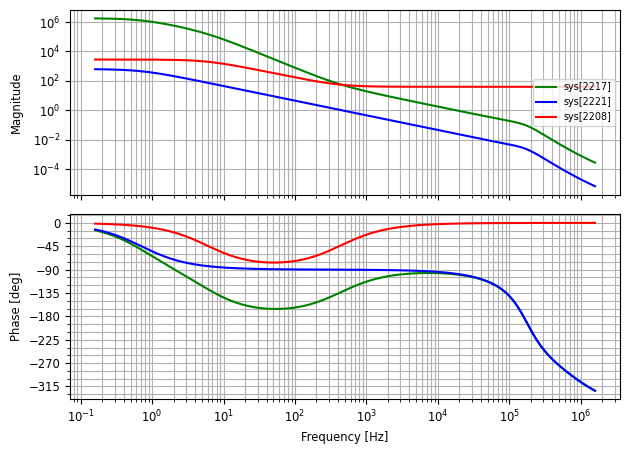

In [244]:
import control as co
import numpy as np

V_IN, V_OUT = 5, 170
N_PS = 1 / 10
D = N_PS * V_OUT / (V_IN + N_PS * V_OUT)
D_PRIME = 1 - D
L = 10e-6
R_LOAD, C_OUT = 17e+3 * 5, 4.7e-6
V_REF = 1.
f_SW = 350e+3
T_SW = 1 / f_SW
R_FB1 = 1e+6
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.01
V_SL = 40e-3
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, V_SL * f_SW / R_s

g_m = 2e-3
R_ea_o = 10e+6
G_comp = 0.142
A_ea_vol = g_m * R_ea_o
f_p2, f_z3 = 0.04 * 0.75 * 200, 1.6 / 0.75 * 200

R_c1 = f_p2 / (f_z3 - f_p2) * R_ea_o
C_c1 = 1 / (R_c1 * 2 * np.pi * f_z3)
A_ea = A_ea_vol * G_comp

# g_m = 2e-3
# R_ea_o = 10e+6
# G_comp = 0.142
# A_ea_vol = g_m * R_ea_o
# f_p2, f_z3 = 0.1, 4

F_m = 1 / (R_s * (S_n + S_e) * T_SW)
G_di = co.tf([(S_n + S_f)], [1, 0])
H_e = co.tf([1 / ((np.pi * f_SW) ** 2), -1 / (2 * f_SW), 1], [1])

G_ivo = N_PS * co.tf([-V_OUT * L / (V_IN * R_LOAD * D_PRIME * N_PS), 1], [C_OUT / D_PRIME, 1 / (D_PRIME * R_LOAD) + N_PS * V_OUT / (V_IN * R_LOAD)])

G_div = R_FB2 / (R_FB1 + R_FB2)

G_fb = A_ea * co.tf([1 / (2 * np.pi * f_z3), 1], [1 / (2 * np.pi * f_p2), 1])

G_inner_loop = co.feedback(F_m * G_di, R_s * H_e)

G_overall_loop = G_inner_loop * G_ivo * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_inner_loop * G_ivo * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')


In [245]:
R_LOAD_dcm = 2 * L * D / (T_SW * N_PS ** 2 * D_PRIME ** 2)

print(R_LOAD_dcm)

10471.999999999995


In [246]:
f_CROSS = f_SW / 10
f_cross = R_LOAD * (D_PRIME ** 2) / (5 * 2 * np.pi * L)

print(f_CROSS, f_cross)

35000.0 13975382.399598246


In [247]:
print(D)


0.7727272727272727


In [248]:
print(R_FB2 / (R_FB1 + R_FB2) * V_OUT)


1.0000000000000002


In [249]:
print(R_FB1, R_FB2)


1000000.0 5917.15976331361


In [250]:
print(S_n, S_f, S_e)
print((S_f - S_e) / (S_n + S_e))


499999.99999999994 1699999.9999999998 1400000.0
0.15789473684210514


In [251]:
R_FA = 2.21 * 10 ** 10 / f_SW - 955

print(R_FA)


62187.857142857145


In [252]:
print(R_c1, C_c1)

142630.74484944533 2.6152804450777594e-09


In [253]:
delta_i_p = V_IN / L * D * T_SW
delta_i_s = delta_i_p * N_PS
delta_v_o = V_OUT / (R_LOAD * C_OUT) * D * T_SW
i_L = V_OUT / (N_PS * D_PRIME * R_LOAD)

print(delta_i_p, delta_v_o, i_L)


1.1038961038961037 0.0009394860458690247 0.08799999999999998


In [254]:
co.dcgain(G_inner_loop * G_ivo)

108974.35897435898

In [255]:
print(G_inner_loop * G_ivo)

<TransferFunction>: sys[2225]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


             -0.7133 s + 4.053e+06
-----------------------------------------------
6.932e-12 s^3 + 8.707e-06 s^2 + 8.381 s + 37.19



In [256]:
I_SS = 10e-6
t_SS = 10e-3
C_SS = t_SS * I_SS / (1 - V_IN / V_OUT)

print(C_SS)

1.0303030303030304e-07
